In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import acquire

### Using your store items data:

In [5]:
df = acquire.get_store_item_demand_data()
df.head()

reading store data from csv
reading itme data from csv
reading sales data from csv
final dataframe compiled


,store_address,store_city,store_id,store_state,store_zipcode,item_id,sale_amount,sale_date,sale_id,item_brand,item_name,item_price,item_upc12,item_upc14
0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_address  913000 non-null  object 
 1   store_city     913000 non-null  object 
 2   store_id       913000 non-null  int64  
 3   store_state    913000 non-null  object 
 4   store_zipcode  913000 non-null  int64  
 5   item_id        913000 non-null  int64  
 6   sale_amount    913000 non-null  float64
 7   sale_date      913000 non-null  object 
 8   sale_id        913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


### Convert date column to datetime format.

In [11]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [16]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

### Plot the distribution of sale_amount and item_price.

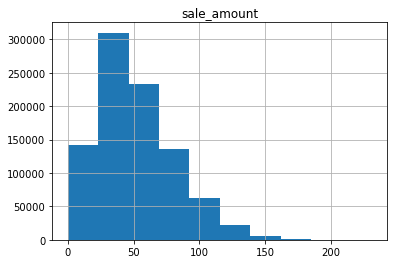

In [18]:
df.sale_amount.hist()
plt.title('sale_amount')
plt.show()

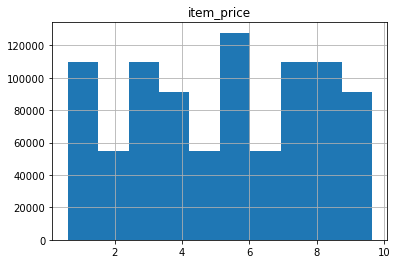

In [19]:
df.item_price.hist()
plt.title('item_price')
plt.show()

### Set the index to be the datetime variable.

In [22]:
df = df.set_index('sale_date')
df.head()

,store_address,store_city,store_id,store_state,store_zipcode,item_id,sale_amount,sale_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,11.0,2,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,14.0,3,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,4,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,10.0,5,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Add a 'month' and 'day of week' column to your dataframe.

In [27]:
df['month'] = df.index.strftime('%B')
df['day of the week'] = df.index.day_name()

In [28]:
df.head()

,store_address,store_city,store_id,store_state,store_zipcode,item_id,sale_amount,sale_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day of the week
sale_date,,,,,,,,,,,,,,,
2013-01-01,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-02,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,11.0,2,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Wednesday
2013-01-03,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,14.0,3,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Thursday
2013-01-04,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,4,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Friday
2013-01-05,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,10.0,5,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Saturday


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [31]:
df['sales_total'] = df.sale_amount * df.item_price

In [32]:
df.head()

,store_address,store_city,store_id,store_state,store_zipcode,item_id,sale_amount,sale_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day of the week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-02,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,11.0,2,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Wednesday,9.24
2013-01-03,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,14.0,3,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Thursday,11.76
2013-01-04,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,4,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Friday,10.92
2013-01-05,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,10.0,5,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Saturday,8.40


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [37]:
def prepare_store(df):
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    df = df.set_index('sale_date')
    df['month'] = df.index.strftime('%B')
    df['day of the week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [38]:
dftest = acquire.get_store_item_demand_data()

reading store data from csv
reading itme data from csv
reading sales data from csv
final dataframe compiled


In [39]:
prepare_store(dftest)

,store_address,store_city,store_id,store_state,store_zipcode,item_id,sale_amount,sale_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day of the week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-02,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,11.0,2,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Wednesday,9.24
2013-01-03,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,14.0,3,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Thursday,11.76
2013-01-04,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,13.0,4,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Friday,10.92
2013-01-05,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,10.0,5,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,8503 NW Military Hwy,San Antonio,10,TX,78231,50,63.0,912996,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,December,Wednesday,327.60
2017-12-28,8503 NW Military Hwy,San Antonio,10,TX,78231,50,59.0,912997,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,December,Thursday,306.80
2017-12-29,8503 NW Military Hwy,San Antonio,10,TX,78231,50,74.0,912998,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,December,Friday,384.80


### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [41]:
df = acquire.get_opsd_data()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [42]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [44]:
df.columns = df.columns.str.lower()
df.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4383 non-null   object 
 1   consumption  4383 non-null   float64
 2   wind         2920 non-null   float64
 3   solar        2188 non-null   float64
 4   wind+solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


### Convert date column to datetime format.

In [46]:
df.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [48]:
df.date = df.date.astype('datetime64')
df.date

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: date, Length: 4383, dtype: datetime64[ns]

### Plot the distribution of each of your variables.

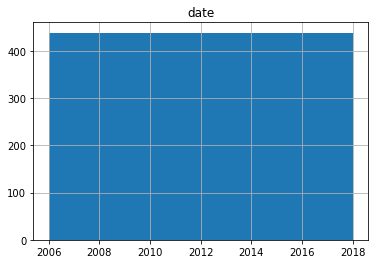

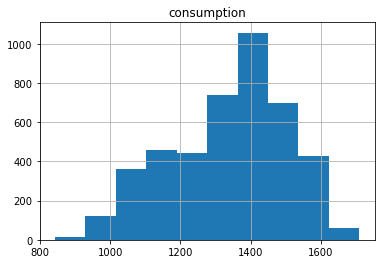

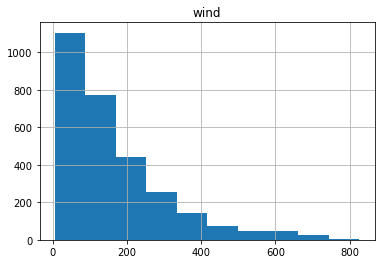

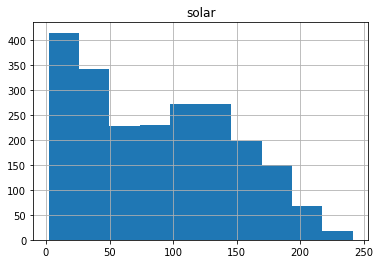

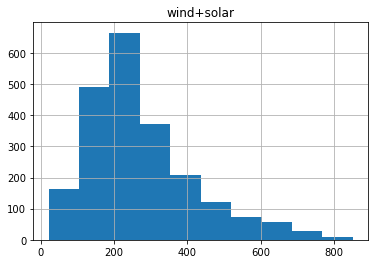

In [49]:
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.show()

### Set the index to be the datetime variable.

In [50]:
df.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [52]:
df = df.set_index('date')
df.head()

,consumption,wind,solar,wind+solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### Add a month and a year column to your dataframe.

In [54]:
df['month'] = df.index.month
df['year'] = df.index.year

In [56]:
df

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,2006
2006-01-02,1380.52100,NaN,NaN,NaN,1,2006
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006
2006-01-04,1457.21700,NaN,NaN,NaN,1,2006
2006-01-05,1477.13100,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


### Fill any missing values.

In [57]:
df.isnull().sum()

consumption       0
wind           1463
solar          2195
wind+solar     2196
month             0
year              0
dtype: int64

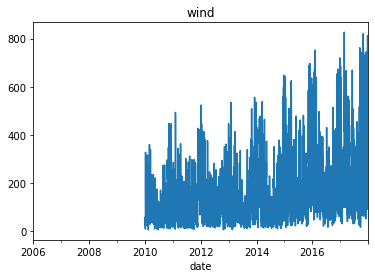

In [59]:
df.wind.plot()
plt.title('wind')
plt.show()

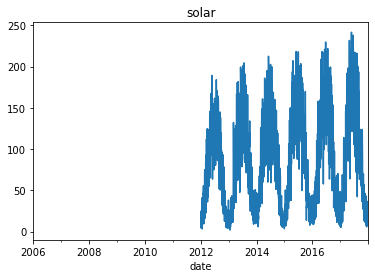

In [60]:
df.solar.plot()
plt.title('solar')
plt.show()

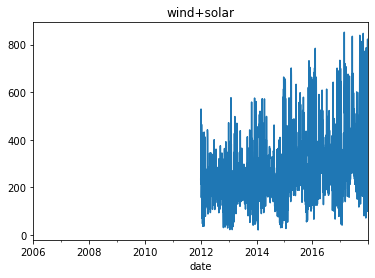

In [61]:
df['wind+solar'].plot()
plt.title('wind+solar')
plt.show()

In [65]:
df = df.fillna(0)
df

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [66]:
def prepare_ops(df):
    df.columns = df.columns.str.lower()
    df.date = df.date.astype('datetime64')
    df = df.set_index('date')
    df['month'] = df.index.month
    df['year'] = df.index.year
    df = df.fillna(0)
    return df

In [67]:
dftest = acquire.get_opsd_data()

In [68]:
prepare_ops(dftest)

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017
